# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False,    
        'is_high_best': True
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['0000101110', '1101001000', '1111101101', '1000101111', '0000010001', '1100101010', '1100010110', '0100010110']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['1000101111', '1111101101', '1100101010', '0100010110', '1100101010', '1100101010', '1000101111', '0000010001']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['11100', '00011', '10000', '01111', '10000', '01111', '11000', '00111']

Mutation:
 ['11111', '00001', '11110', '00000', '11011', '00010', '11111', '00100']


A new generation:
 ['11100', '00111', '10000', '01111', '01100', '01011', '10000', '10111']


## 2: Demo GA - Sine [0, 128]

In [57]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 30,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.03,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 30, 
        'sine_constraint': False,    
        'is_high_best': True
    }

algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log_2 = algorithm_2.run()

Algorithm succsessfully executed


In [58]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_2.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')
        

Generation: 0 

Population: ['100001100101101110000000011001', '110010011011000011001111101010', '011101110110100011110000010011', '110010110010001110011011001101', '110100000011111110110011000011', '111100111000100100111011010010', '110000110001101010011001011010', '101101111000101111001011000011', '011000011101110100010001101000', '101100010010100111011101001100', '001100001101000011100011010110', '000110110111101011110111010111', '000100110001001100000100011100', '110111111000001111101110000101', '000100111000000011111111111010', '100011100001011011011011100110', '100111100110000000101010101000', '000001100101100110110110110101', '101111100011111000110100000101', '000110111011101110010111011110'] 

Population weights: [2.00909221e-03 6.52852341e-02 4.87980779e-02 9.34056741e-02
 2.73215307e-02 8.43931997e-02 4.13073252e-02 1.80640977e-02
 7.02842031e-05 7.90034258e-02 1.58020011e-02 9.64872421e-02
 4.38388326e-02 0.00000000e+00 3.31885818e-02 9.72044140e-02
 1.88230672e-02 4.7834716

<IPython.core.display.Javascript object>


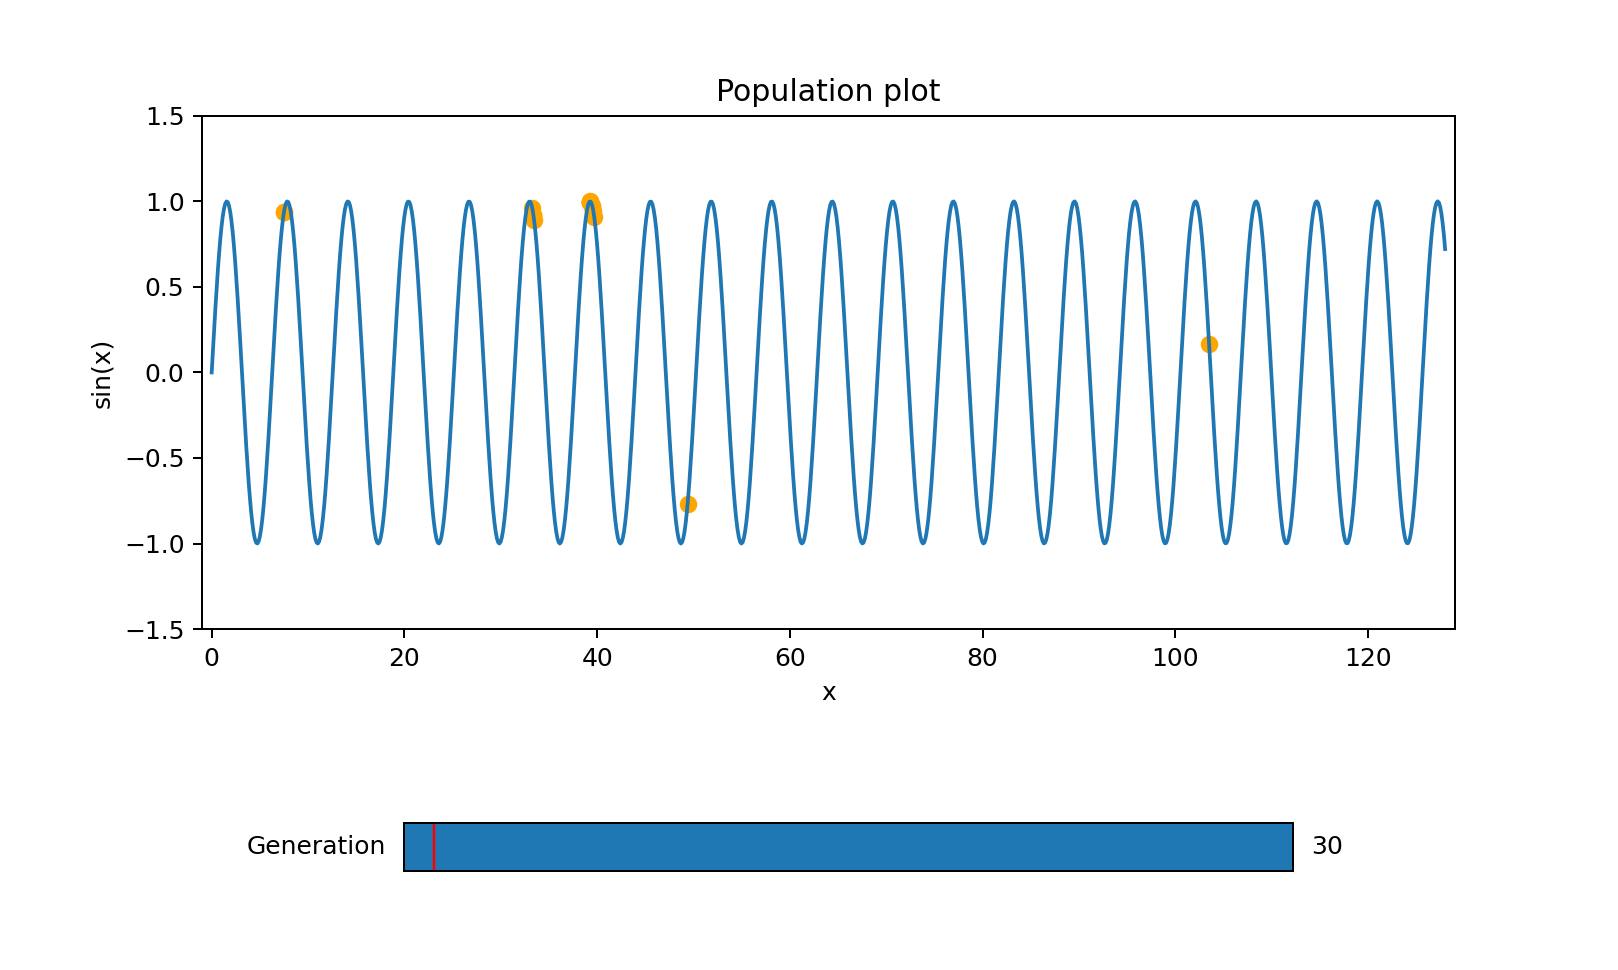

0

In [59]:
# Plot the population through the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


DATA = eval_log_2

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


    


<IPython.core.display.Javascript object>


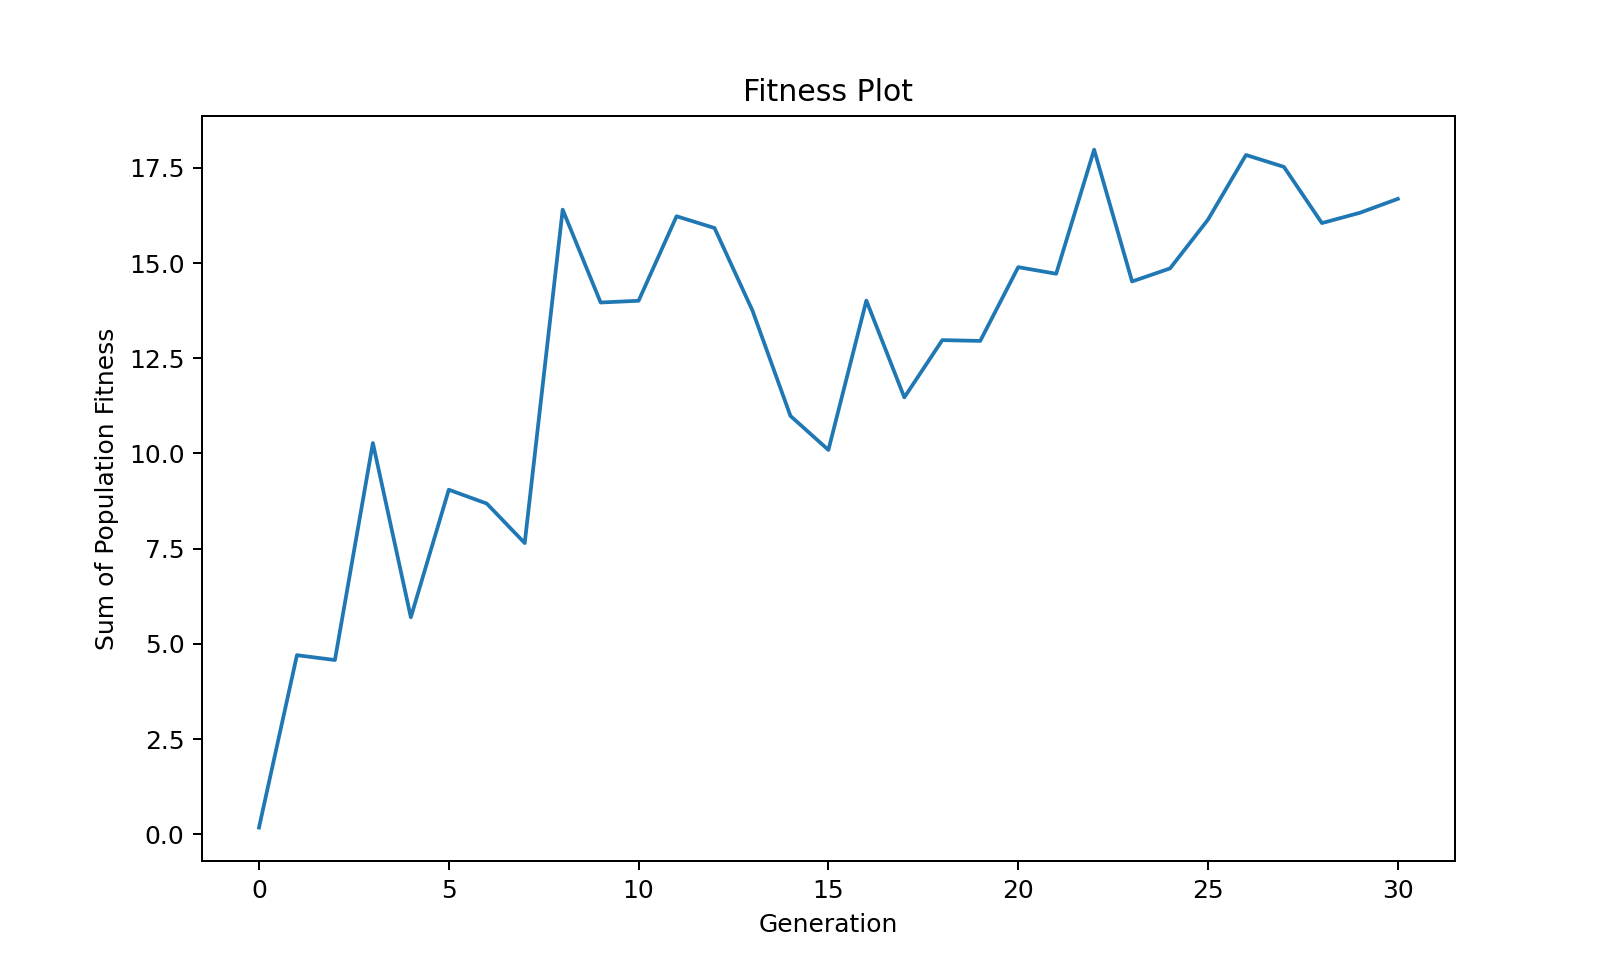

In [60]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_2[i][3]) for i in eval_log_2.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [61]:
params_3 = {
        'indiv_len': 30,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.03,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 30, 
        'sine_constraint': True,     # THIS ONE IS TRUE NOW 
        'is_high_best': True
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()

Algorithm succsessfully executed


In [62]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_3.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')

Generation: 0 

Population: ['011010000001010010100010110100', '011111001001101110100110011111', '010100011000100110000111100001', '101001010000010010000010110011', '001001100100110010010101000011', '011111010011010010001010010111', '110010101000011000101001111010', '000011001010101111010101100111', '100000101101111100111011000000', '000010111000011000101110110001', '101010010101100110001001000011', '010001111111011110111111011100', '100011011011011010110100100111', '000100100011001100100111101101', '000110110010101101011001111011', '011100010000100111010010111010', '001111100001000111100110110001', '001101001111101101010001000011', '111101011100011011101001011100', '000110110010101111000111100010'] 

Population weights: [0.         0.         0.         0.         0.         0.
 0.         0.35940867 0.         0.20756357 0.         0.
 0.         0.43302777 0.         0.         0.         0.
 0.         0.        ] 

Population sine fitness value: ['-1.25', '-1.25', '-1.25', '-1.25'

<IPython.core.display.Javascript object>


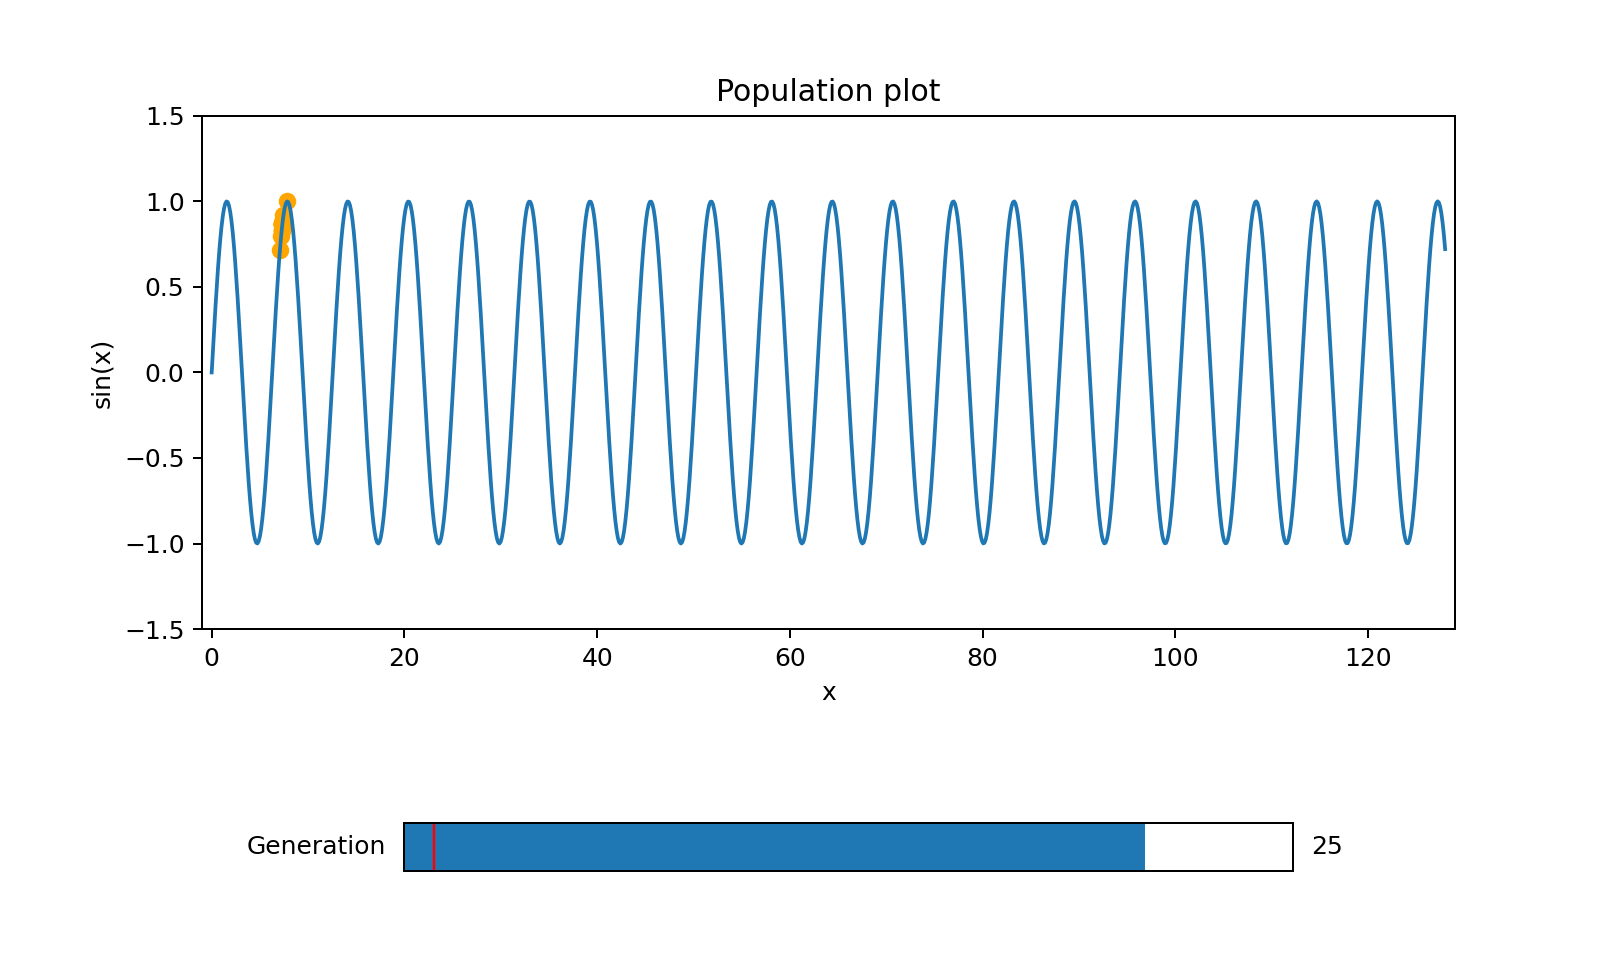

0

In [63]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


<IPython.core.display.Javascript object>


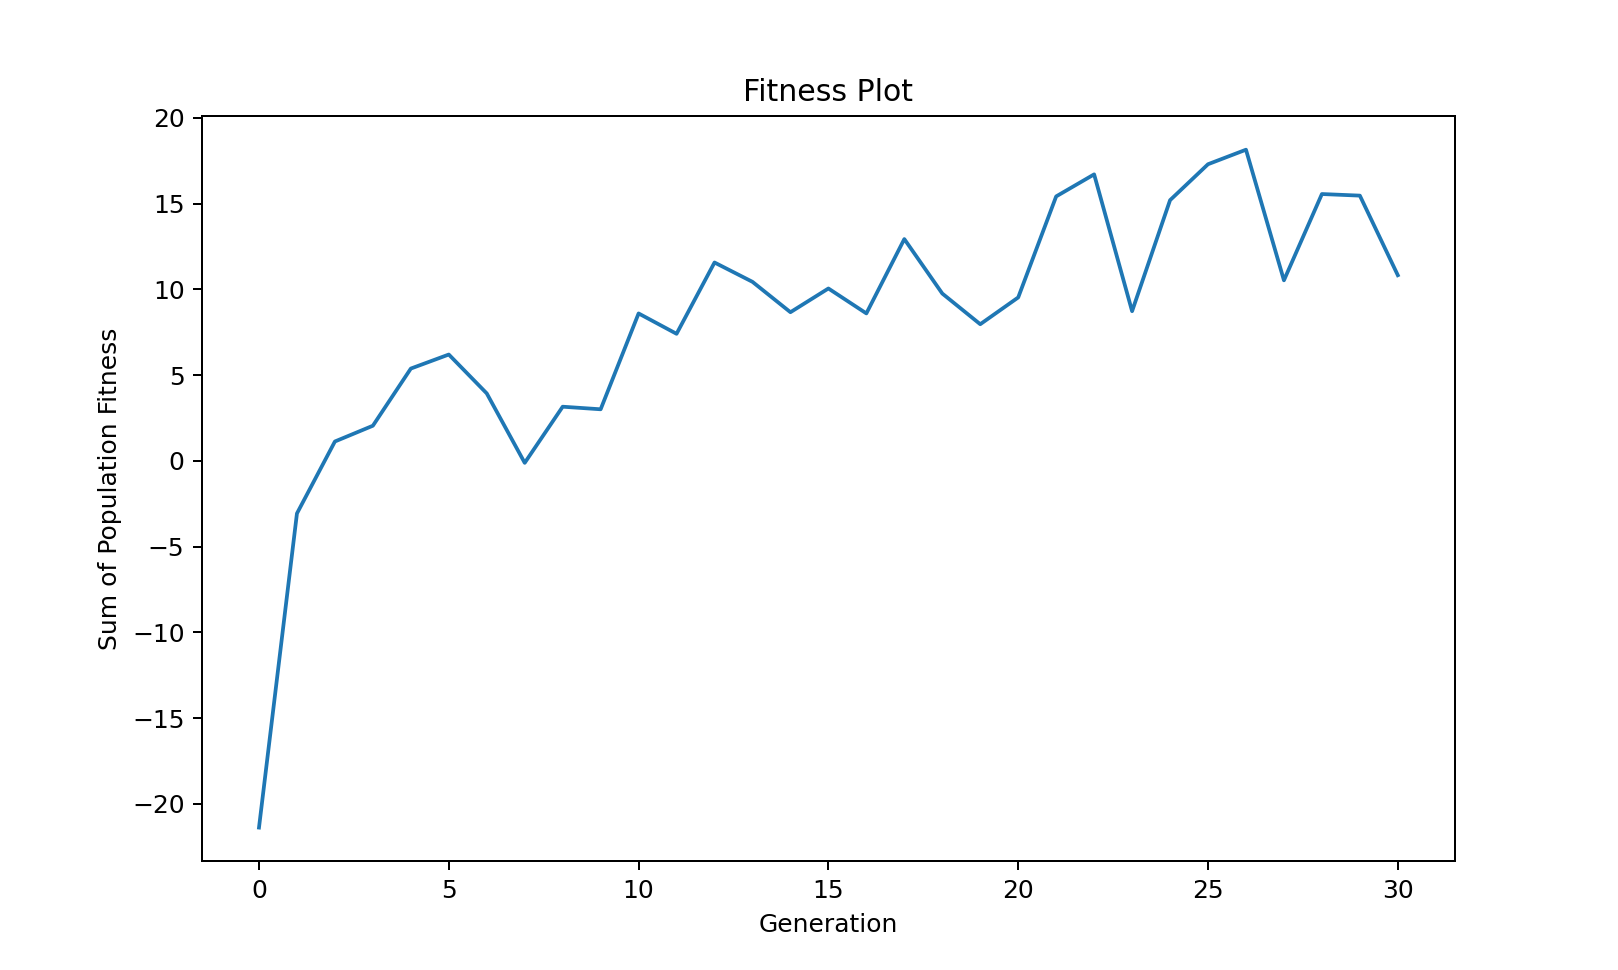

In [64]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_3[i][3]) for i in eval_log_3.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 4: Demo GA - Feature selection

In [14]:
# View data set

data_df = pd.read_csv('data/data.csv', index_col=[0])
values_df = pd.read_csv('data/values.csv', index_col=[0])
display(data_df, values_df)

0     1     2     3     4     5     6     7     8     9  ...    92  \
0      8.0   1.0  0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  ...  0.12   
1     53.0   1.0  0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  ...  0.21   
2     24.0   1.0  0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  ...  0.14   
3     34.0   1.0  0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  ...  0.19   
4     42.0   1.0  0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  ...  0.11   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1988  28.0  10.0  0.02  0.41  1.00  0.21  0.02  0.01  0.54  0.57  ...  0.01   
1989  12.0  10.0  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  ...  0.22   
1990   6.0  10.0  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  ...  0.53   
1991   9.0  10.0  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  ...  0.25   
1992  25.0  10.0  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  ...  0.45   

        93    94    95    96    97    98    99   100   101  
0     0.42  0.50  0.51  0.64  0.12  0.26  0.20  0.32  0.20  
1     0.50  0.34  0.60  0.52  0.02  0.12  0.45  0.00  0.67  
2     0.49  0.54  0.67  0.56  0.01  0.21  0.02  0.00  0.43  
3     0.30  0.73  0.64  0.65  0.02  0.39  0.28  0.00  0.12  
4     0.72  0.64  0.61  0.53  0.04  0.09  0.02  0.00  0.03  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1988  0.75  0.57  0.74  0.71  0.03  0.17  0.02  0.00  0.19  
1989  0.28  0.34  0.48  0.39  0.01  0.28  0.05  0.00  0.09  
1990  0.25  0.17  0.10  0.00  0.02  0.37  0.20  0.00  0.45  
1991  0.68  0.61  0.79  0.76  0.08  0.32  0.18  0.91  0.23  
1992  0.64  0.54  0.59  0.52  0.03  0.38  0.33  0.22  0.19  

[1993 rows x 102 columns]

0     1    2     3     4     5     6     7    8     9  ...    92   93  \
0  6.0  10.0  0.2  0.78  0.14  0.46  0.24  0.77  0.5  0.62  ...  0.68  0.5   

     94    95    96    97   98    99  100   101  
0  0.34  0.35  0.68  0.11  0.3  0.05  1.0  0.48  

[1 rows x 102 columns]

In [65]:
# RMSE Error Without Feature Selection
import LinReg


linreg = LinReg.LinReg()
feats = values_df.to_numpy().shape[1]
x = data_df.to_numpy().reshape(feats, data_df.to_numpy().shape[0])
y = values_df.to_numpy().reshape(feats, 1)
error = linreg.get_fitness(x, y)

print('Error without feture selection:', error)
    

Error without feture selection: 1.1948934351036553


In [71]:
params_4 = {
        'indiv_len': 102,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.03,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 40, 
        'sine_constraint': False, 
        'is_high_best': False
    }

algorithm_4 = GA(params_4, fitness=feature_fitness)
eval_log_4 = algorithm_4.run()

Algorithm succsessfully executed


In [72]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_4.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation', generation, ':\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population RMSE error:', ['{:.3f}'.format(item) for item in data[3]], '\n\n')

Generation 0 :

Population: ['100101001001010011110110101010010110001001111100001011011011000100011101101101000010001011111101101010', '001100111010000000110100110011111011111010010010110011101010110001111001100110110111011001100110011010', '010010010101011111010010011010000010111011101100001000110011101101111100000011000100100110110011010010', '010110000111011111011111110001001010000000001000101000111001010110000000111110101100010011011110001001', '011100011011001001011000110110111111011111100000100110111101111001011011011101101100010000000100100110', '011111010110111001101100011110110100110111000001010010101011001010001011110111100011010101001000001100', '010110100101000010110101100000100001011001111001011010101001011100000001100110110111001000110001011010', '111100110100111001010001101101101100110000000100111011011110111001101110110100100001110100100111001110', '111100101111010010001010011111000101111110110000101000001101101100100011010001111111001110110101000100', '1001111110011000

<IPython.core.display.Javascript object>


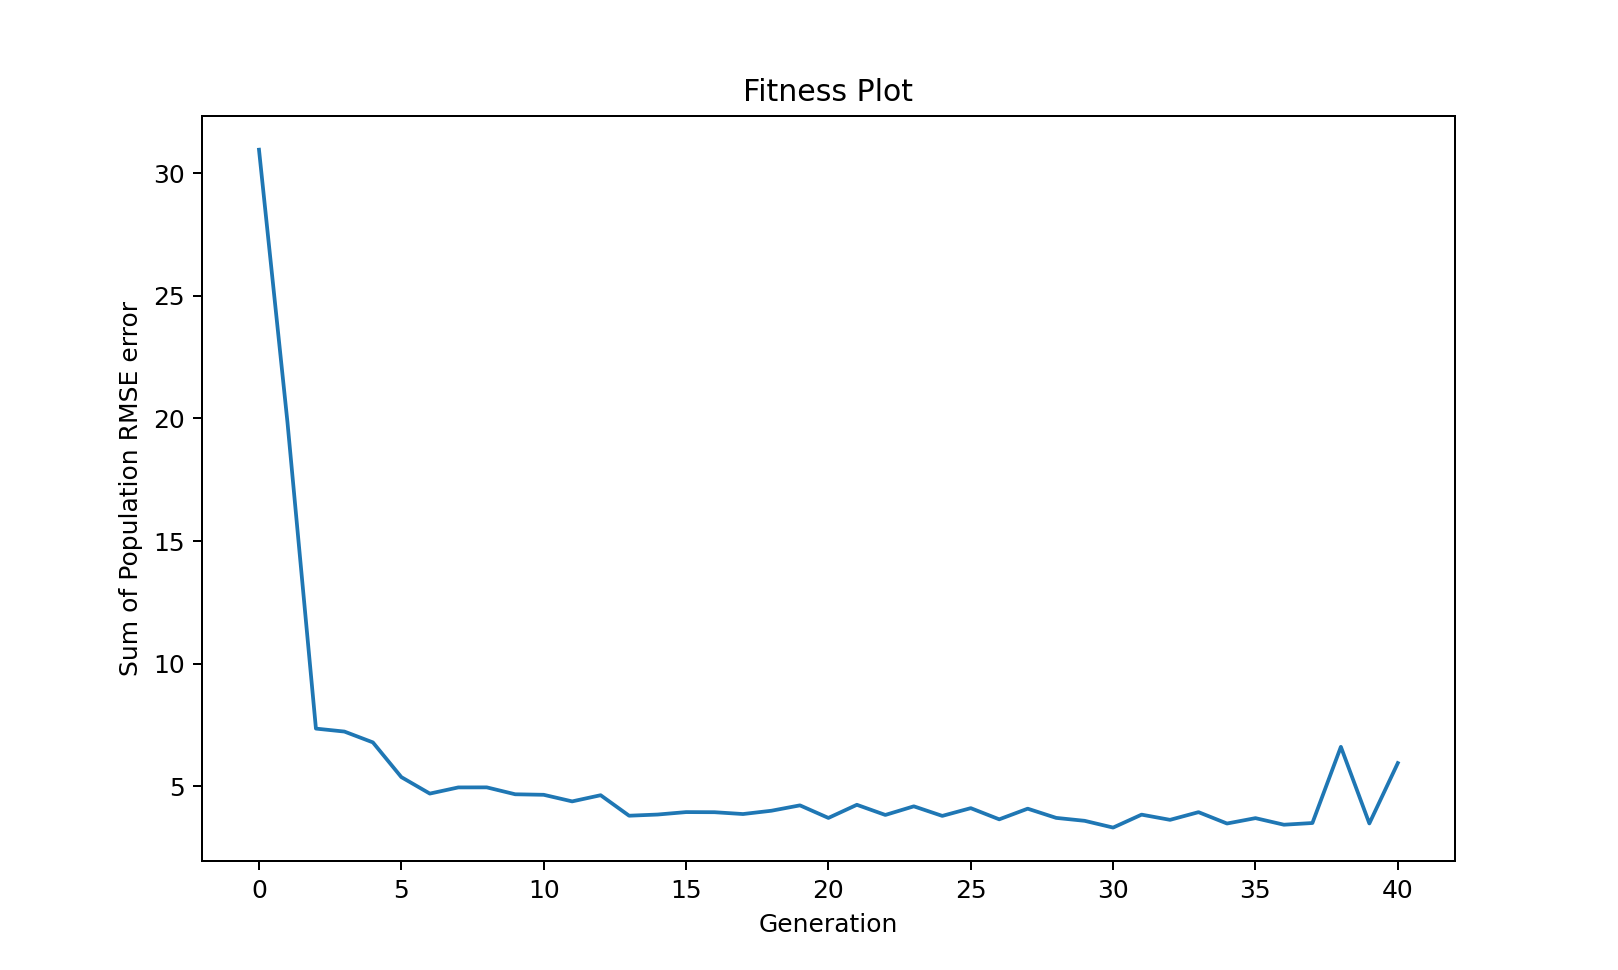

In [73]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_4[i][3]) for i in eval_log_4.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population RMSE error");
axs.plot(gen_fitness)



In [74]:
# Print key measures
print('Last 10 generation average: min, mean, medidan:')
min_list = [min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-5:]]
mean_list = [np.mean(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-5:]]
median_list = [np.median(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-5:]]

print(['{:.3f}'.format(item) for item in [np.mean(min_list), np.mean(mean_list), np.mean(median_list)]], '\n')
min_list.sort()
print('Five fittest individuals:', ['{:.3f}'.format(item) for item in min_list[:5]])

Last 10 generation average: min, mean, medidan:
['0.122', '0.230', '0.177'] 

Five fittest individuals: ['0.109', '0.122', '0.123', '0.127', '0.130']


In [75]:
min_dict = {eval_log_4[i][np.argmin(min(eval_log_4[i][3]))][3]:min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]}
print('The best individuals from the last 10 generations:\n')
for key, value in min_dict.items():
    print(key, 'Fitness: {:.3f}'.format(value))


The best individuals from the last 10 generations:

000111111001100001011110110111101010010101101001100001010110100100001000101010111100100001000101001010 Fitness: 0.120
000111111001100001011110110111101010010101101000100001010110100100001000101010111100100001000101101010 Fitness: 0.131
000111111001100001011110110011101010010101101001101001010110100110001000001000111100100001110101101010 Fitness: 0.138
000111111001100001011110011101101010010101101001100101010110100100001000000010111101100001000101101010 Fitness: 0.138
000111111001100001011110111101101010000101101001100101010110100100001100000010111101000001000101101010 Fitness: 0.123
000111111001100001011110011101101110010101101001100101010110100100001000000010111101100001000101101011 Fitness: 0.130
000111111001100001011110011101101010010101101001110101010110100100001000000010111101100001000111001010 Fitness: 0.123
000111111001100001011110011101101010010101101001100101010100110100001000000010111101110000000101101010 Fitness: 0.122
0001

## 5: Demo GA - Sine [5, 10] with Crowding

In [50]:
# Deterministic crowding 

dummy_parents = ['111111111111111', '000000000000000']
dummy_offsprings = ['000001000000100', '111110111111110']
parents_fitness = [0.9, 0.5]
offsprings_fitness = [0.6, 0,4]

pop = crowding_selection(dummy_parents, dummy_offsprings, parents_fitness, offsprings_fitness, is_high_best=True)
print(pop)


['111111111111111', '000001000000100']


In [55]:
params_5 = {
        'indiv_len': 30,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.03,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 30, 
        'sine_constraint': True,     # THIS ONE IS TRUE NOW,    
        'is_high_best': True
    }

algorithm_3new = GA(params_5, fitness=sine_fitness)
algorithm_5 = GA(params_5, fitness=sine_fitness, survival_selecter=crowding_selection)

eval_log_3new = algorithm_3new.run()
eval_log_5 = algorithm_5.run()

Algorithm succsessfully executed
Algorithm succsessfully executed


<IPython.core.display.Javascript object>


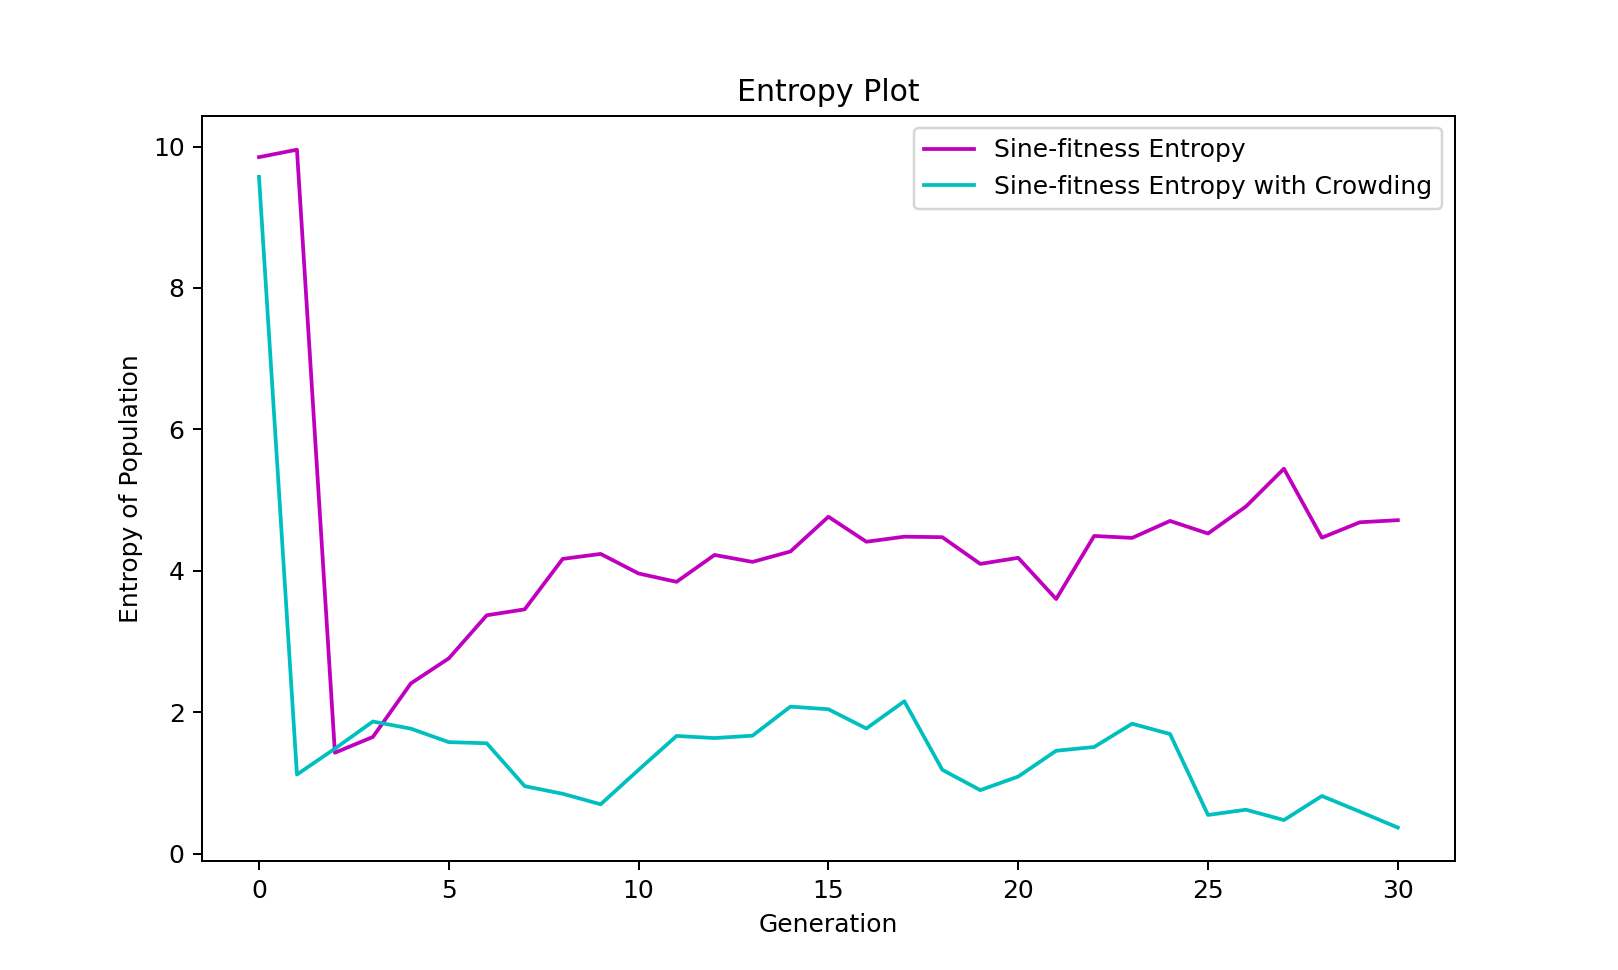

In [56]:
# Plot the population entropy per generation

gen_entropy = [eval_log_3new[i][4] for i in eval_log_3new.keys()]          # ORIGINAL
gen_entropy_crow = [eval_log_5[i][4] for i in eval_log_5.keys()]     # WITH CROWDING
#print(gen_entropy, gen_entropy_crow)

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Entropy Plot")
plt.xlabel("Generation")
plt.ylabel("Entropy of Population");
plt.plot(gen_entropy, color='m', label='Sine-fitness Entropy')
plt.plot(gen_entropy_crow, color='c', label='Sine-fitness Entropy with Crowding')
plt.legend()


## 6: Demo GA - Feature selection with Crowding

In [53]:
params_6 = {
        'indiv_len': 102,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.03,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 30, 
        'sine_constraint': False, 
        'is_high_best': False
    }

algorithm_4new = GA(params_6, fitness=feature_fitness)
algorithm_6 = GA(params_6, fitness=feature_fitness, survival_selecter=crowding_selection)

eval_log_4new = algorithm_4new.run()
eval_log_6 = algorithm_6.run()

Algorithm succsessfully executed
Algorithm succsessfully executed


<IPython.core.display.Javascript object>


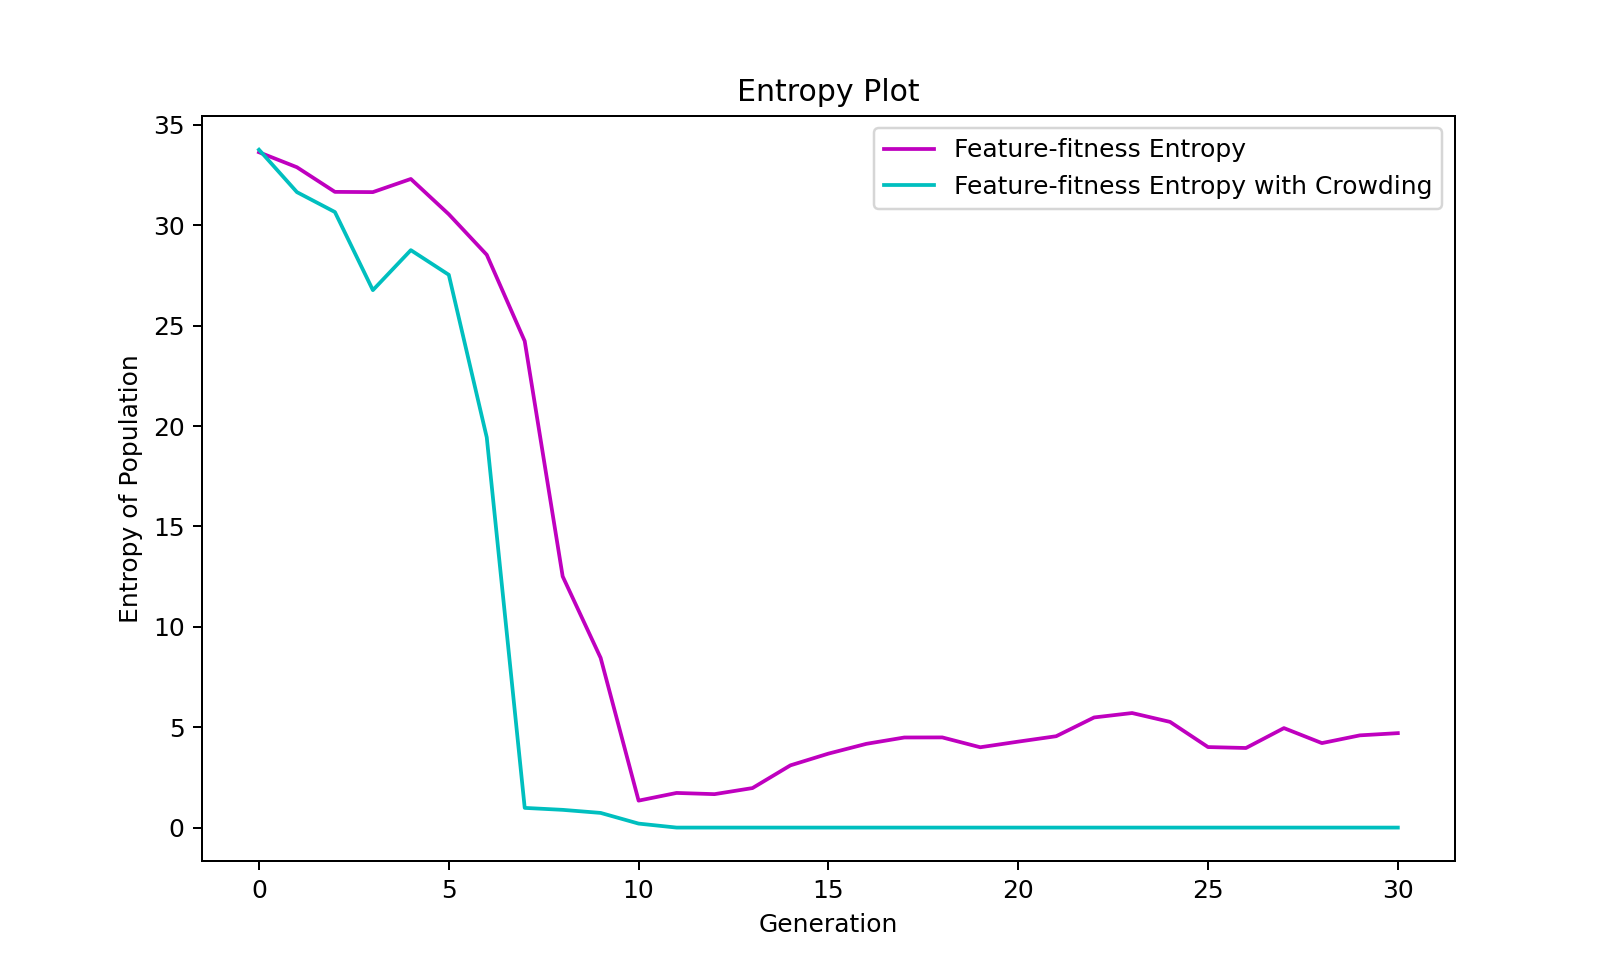

In [54]:
# Plot the fitness sum per generation

gen_entropy = [eval_log_4new[i][4] for i in eval_log_4new.keys()]          # ORIGINAL
gen_entropy_crow = [eval_log_6[i][4] for i in eval_log_6.keys()]     # WITH CROWDING
#print(gen_entropy, gen_entropy_crow)

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Entropy Plot")
plt.xlabel("Generation")
plt.ylabel("Entropy of Population");
plt.plot(gen_entropy, color='m', label='Feature-fitness Entropy')
plt.plot(gen_entropy_crow, color='c', label='Feature-fitness Entropy with Crowding')
plt.legend()
